In [91]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import glob
import matplotlib.pyplot as plt
import scipy.stats

In [279]:
exp_files = [
    "022820_mESC_PE_peptide_library_Rep1",
    "022820_mESC_PE_peptide_library_Rep1B",
    "022720_mESC_PE_peptide_library_Rep2",
    "022720_mESC_PE_peptide_library_Rep2B",
    "022820_mESC_PE_peptide_library_Rep3",
    "022820_mESC_PE_peptide_library_Rep3B"
]

labels = [
    "mESC Rep1",
    "mESC Rep1B",
    "mESC Rep2",
    "mESC Rep2B",
    "mESC Rep3",
    "mESC Rep3B",
]

joined_df = None 

s = set()

for label, f in zip(labels , exp_files):
    df = pd.read_csv("./Data/" + f + ".csv", index_col = "Name")
    s = s.union(set(df.index))
    print(len(df))
    cols_keeping = ["Wild-type", "Prime edit", "indel", "other"]
    z = list(df.columns)
    for val in cols_keeping:
        z.remove(val)
    
    df = df.drop(columns = z)
    df = df.rename(columns = {
        "Wild-type" : f"{label} Wild Type", 
        "Prime edit" : f"{label} Prime edit", 
        "indel" : f"{label} Indel",
        "other": f"{label} Other"
    })
    
    if joined_df is None :
        joined_df = df
    else:
        if len(joined_df) > len(df):
            joined_df = joined_df.join(df, how = "outer")
        else:
            joined_df = df.join(joined_df, how = "outer")
    


print(len(s), len(joined_df))
joined_df.to_csv("mESC_PE_peptide_library_rep_counts.csv")

8595
8631
9682
9584
8952
8383
10211 10211


In [278]:
exp_files = [
    "022820_mESC_PE_peptide_library_Rep1",
    
    "022820_mESC_PE_peptide_library_Rep1B",
    
    "022720_mESC_PE_peptide_library_Rep2",
   
    "022720_mESC_PE_peptide_library_Rep2B",

    "022820_mESC_PE_peptide_library_Rep3",
   
    "022820_mESC_PE_peptide_library_Rep3B",
   
    
    "022820_mESC_PE_peptide_library_Rep1_control",
     "022820_mESC_PE_peptide_library_Rep1B_control",
     "022720_mESC_PE_peptide_library_Rep2_control",
        "022720_mESC_PE_peptide_library_Rep2B_control",
     "022820_mESC_PE_peptide_library_Rep3_control",
     "022820_mESC_PE_peptide_library_Rep3B_control"
]

labels = [
    "mESC Rep1",
    "mESC Rep1B",
    "mESC Rep2",
    "mESC Rep2B",
    "mESC Rep3",
    "mESC Rep3B",
    "mESC Rep1 Control",
    "mESC Rep1B",
    "mESC Rep2",
    "mESC Rep2B",
    "mESC Rep3",
    "mESC Rep3B",
]

joined_df = None 

s = set()

for label, f in zip(labels , exp_files):
    df = pd.read_csv("./Data/" + f + ".csv", index_col = "Name")
    s = s.union(set(df.index))
    print(len(df))
    cols_keeping = ["Wild-type", "Prime edit", "indel", "other"]
    z = list(df.columns)
    for val in cols_keeping:
        z.remove(val)
    
    df = df.drop(columns = z)
    df = df.rename(columns = {
        "Wild-type" : f"{label} Wild Type", 
        "Prime edit" : f"{label} Prime edit", 
        "indel" : f"{label} Indel",
        "other": f"{label} Other"
    })
    
    if joined_df is None :
        joined_df = df
    else:
        if len(joined_df) > len(df):
            joined_df = joined_df.join(df, how = "outer")
        else:
            joined_df = df.join(joined_df, how = "outer")


8595
113
8631
105
9682
121
9584
121
8952
118
8383
111


In [273]:
df = pd.read_csv("./Data/021920__mESC_PE_peptide_Library_WT_before_editing.csv")
df

,Unnamed: 0,Prime edit,Wild-type,indel,other,prime_edit,Name,Unnamed: 0.1,Protein,Peptide.number.within.gene,Sequence,BarcodedSeq,barcode,FinalSeq,Design category,Gene,Total,prime_edit fraction,prime_edit logit fraction
0,0,0.0,413.0,1.0,4.0,0.0,hblOligo4208_Cat3,0,NM_1001655,1.0,TCTCGGACAATGGTGAAAGGCGCACAAGGTGGTTTGCTCCGCAAAC...,TCTCGGACAATGgtgaaaggcgcacaaggtggtttgctccgcaaac...,TCTCGGACAATG,ATCCACCGGTACCATGGCTAGCTCTCGGACAATGgtgaaaggcgca...,3_4778_st_to_e_dna_repair_peptides_9NATG,ALKBH2,413.0,0.0,NaN
1,1,0.0,450.0,0.0,6.0,0.0,hblOligo4208_Cat2,1,NM_1001655,1.0,GACCGCTTCTTGGTGAAAGGCGCACAAGGTGGTTTGCTCCGCAAAC...,gaccgcttcttggtgaaaggcgcacaaggtggtttgctccgcaaac...,NaN,ATCCACCGGTACCATGGCTAGCgaccgcttcttggtgaaaggcgca...,2_wt_dna_repair_peptides,ALKBH2,450.0,0.0,NaN
2,2,0.0,264.0,0.0,0.0,0.0,hblOligo135333_Cat3,2,NM_1001655,2.0,CCACACGGAATGGGGCATGAGGCCGGTCCAGAGTGGCGCCATATCC...,CCACACGGAATGgggcatGAGgccggtccaGAGtggcgccatatcc...,CCACACGGAATG,ATCCACCGGTACCATGGCTAGCCCACACGGAATGgggcatGAGgcc...,3_4778_st_to_e_dna_repair_peptides_9NATG,ALKBH2,264.0,0.0,NaN
3,4,0.0,400.0,1.0,1.0,0.0,hblOligo4209_Cat3,4,NM_1001655,3.0,TGTAAGATTATGGCCTTGGCTCGCGTTCAAGTCTTTGGCAAATGGC...,TGTAAGATTATGgccttggctcgcgttcaagtctttggcaaatggc...,TGTAAGATTATG,ATCCACCGGTACCATGGCTAGCTGTAAGATTATGgccttggctcgc...,3_4778_st_to_e_dna_repair_peptides_9NATG,ALKBH2,400.0,0.0,NaN
4,5,0.0,946.0,8.0,7.0,0.0,hblOligo4209_Cat2,5,NM_1001655,3.0,TATTTCACCGGTGCCTTGGCTCGCGTTCAAGTCTTTGGCAAATGGC...,tatttcaccggtgccttggctcgcgttcaagtctttggcaaatggc...,NaN,ATCCACCGGTACCATGGCTAGCtatttcaccggtgccttggctcgc...,2_wt_dna_repair_peptides,ALKBH2,946.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10267,11995,0.0,344.0,2.0,3.0,0.0,XRCC-5_Cterminal_85aa_aa80_to_alanine,11995,NaN,NaN,GCGTCCCGTATGGAGCAGCGCTTCAATAATTTCCTCAAAGCACTTC...,GCGTCCCGTATGGAGCAGCGCTTCAATAATTTCCTCAAAGCACTTC...,GCGTCCCGTATG,ATCCACCGGTACCATGGCTAGCGCGTCCCGTATGGAGCAGCGCTTC...,alanine_scan,NaN,344.0,0.0,NaN
10268,11996,0.0,564.0,0.0,1.0,0.0,XRCC-5_Cterminal_85aa_aa81_to_alanine,11996,NaN,NaN,AGCATCCTTATGGAGCAGCGCTTCAATAATTTCCTCAAAGCACTTC...,AGCATCCTTATGGAGCAGCGCTTCAATAATTTCCTCAAAGCACTTC...,AGCATCCTTATG,ATCCACCGGTACCATGGCTAGCAGCATCCTTATGGAGCAGCGCTTC...,alanine_scan,NaN,564.0,0.0,NaN
10269,11997,0.0,298.0,1.0,0.0,0.0,XRCC-5_Cterminal_85aa_aa82_to_alanine,11997,NaN,NaN,GCGTTAAGCATGGAGCAGCGCTTCAATAATTTCCTCAAAGCACTTC...,GCGTTAAGCATGGAGCAGCGCTTCAATAATTTCCTCAAAGCACTTC...,GCGTTAAGCATG,ATCCACCGGTACCATGGCTAGCGCGTTAAGCATGGAGCAGCGCTTC...,alanine_scan,NaN,298.0,0.0,NaN
10270,11998,0.0,1684.0,12.0,2.0,0.0,XRCC-5_Cterminal_85aa_aa83_to_alanine,11998,NaN,NaN,TCTGAGTGCATGGAGCAGCGCTTCAATAATTTCCTCAAAGCACTTC...,TCTGAGTGCATGGAGCAGCGCTTCAATAATTTCCTCAAAGCACTTC...,TCTGAGTGCATG,ATCCACCGGTACCATGGCTAGCTCTGAGTGCATGGAGCAGCGCTTC...,alanine_scan,NaN,1684.0,0.0,NaN


In [281]:

control_file_names = [
    "022820_mESC_PE_peptide_library_Rep1_control",
    "022820_mESC_PE_peptide_library_Rep1B_control",
    "022720_mESC_PE_peptide_library_Rep2_control",
    "022720_mESC_PE_peptide_library_Rep2B_control",
    "022820_mESC_PE_peptide_library_Rep3_control",
    "022820_mESC_PE_peptide_library_Rep3B_control"
]

labels = [
    "mESC Rep1",
    "mESC Rep1B",
    "mESC Rep2",
    "mESC Rep2B",
    "mESC Rep3",
    "mESC Rep3B",
]

joined_df = None 

for label, f in zip(labels , control_file_names):
    df = pd.read_csv("./Data/" + f + ".csv", index_col = "Name")
    print(len(df))
    cols_keeping = ["Wild-type", "Prime edit", "indel", "other"]
    z = list(df.columns)
    for val in cols_keeping:
        z.remove(val)
    df = df.drop(columns = z)
    df = df.rename(columns = {
        "Wild-type" : f"{label} Wild Type", 
        "Prime edit" : f"{label} Prime edit", 
        "indel" : f"{label} Indel",
        "other": f"{label} Other"
    })
    
    if joined_df is None :
        joined_df = df
    else:
        if len(joined_df) > len(df):
            joined_df = joined_df.join(df, how = "outer")
        else:
            joined_df = df.join(joined_df, how = "outer")
    
            
            
    
joined_df.to_csv("control_mESC_PE_peptide_library_rep_counts.csv")

113
105
121
121
118
111


In [292]:
df1 = pd.read_csv("mESC_PE_peptide_library_rep_counts.csv", index_col = 0)
df2 = pd.read_csv("control_mESC_PE_peptide_library_rep_counts.csv", index_col = 0)

df3 = pd.concat([df1, df2])

lst = sorted(list(df3.columns))

df3 = df3[lst]
df3 = df3.fillna(0)


df3.to_csv("mESC_PE_peptide_library_rep_counts_with_controls.csv")



8595
8631
9682
9584
8952
8383


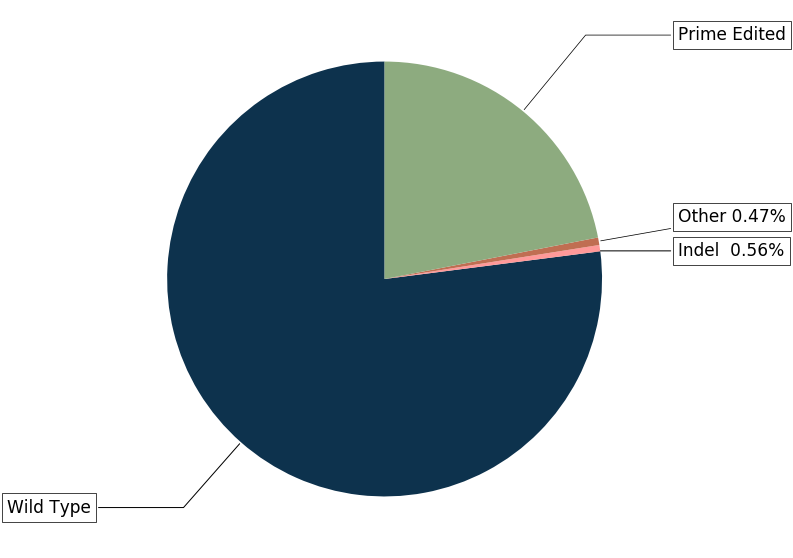

In [236]:
files = glob.glob("./Data/*.csv")

indels = []
others = []
wts = []
pes = []
totals = []
peptide_nums = []



control_file_names = [
    "022820_mESC_PE_peptide_library_Rep1_control",
    "022820_mESC_PE_peptide_library_Rep1B_control",
    "022720_mESC_PE_peptide_library_Rep2_control",
    "022720_mESC_PE_peptide_library_Rep2B_control",
    "022820_mESC_PE_peptide_library_Rep3_control",
    "022820_mESC_PE_peptide_library_Rep3B_control"
]

labels = [
    "mESC Rep1",
    "mESC Rep1B",
    "mESC Rep2",
    "mESC Rep2B",
    "mESC Rep3",
    "mESC Rep3B",
]

for label, f in zip(labels, control_file_names):
    df = pd.read_csv("./Data/" + f + ".csv")
    print(len(df))
    df = df.loc[df["Total"] >= 100]
    wts = wts + list( df["Wild-type"].values)
    indels = indels + list(df["indel"])
    others = others + list(df["other"])
    pes = pes + list(df["prime_edit"])
    totals = totals +  list(df["prime_edit"]) +  list(df["other"]) + list(df["indel"]) + list( df["Wild-type"].values)
    

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(aspect="equal"))

t = np.sum(totals)
data = [
     np.sum(wts) / t ,
     np.sum(indels) / t, 
     np.sum(others) / t,
     np.sum(pes) / t, 
]

labels = ['Wild Type', 'Indel  0.56%', 'Other 0.47%',  'Prime Edited']
colors = ['#0D324D', '#ff9999','#C06E52','#8DAB7F']

wedges, texts = ax.pie(data, wedgeprops=dict(width=1), colors = colors, startangle=90)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")


for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang)) 
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))] 
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    if "Other" in labels[i]:
        kw["va"] = "bottom"
        kw["arrowprops"].update({"lw": 0.73})
        
    if "Indel" in labels[i]:
        kw["va"] = "top"
        ax.annotate(labels[i], 
            fontsize = 17, 
            xy=(x, y), 
            xytext=(1.35*np.sign(x), 1.4*(y-0.02)),
            horizontalalignment=horizontalalignment, **kw
        )
    else:
        
        ax.annotate(labels[i], 
                    fontsize = 17, 
                    xy=(x, y), 
                    xytext=(1.35*np.sign(x), 1.4*y),
                    horizontalalignment=horizontalalignment, **kw
        )
        

# ax.text(-0.4, -0.4, "77.03%", c = "white", fontsize = 17)
# ax.text(0.4, 0.4, "21.94%", c = "white", fontsize = 17)
# print(data)

In [4]:
list(zip(data,  ["WT", "Other", "Indel", "Prime Edited"]))

[(0.7703259928171903, 'WT'),
 (0.004691323932207101, 'Other'),
 (0.005580362815958585, 'Indel'),
 (0.21940232043464405, 'Prime Edited')]

In [232]:
all_reads = {}

In [234]:
files = glob.glob("./Data/*.csv")

indels = []
others = []
wts = []
pes = []
totals = []
peptide_nums = []

exp_files = [
    "022820_mESC_PE_peptide_library_Rep3B",
    "022820_mESC_PE_peptide_library_Rep1",
    "022720_mESC_PE_peptide_library_Rep2B",
    "022820_mESC_PE_peptide_library_Rep3",
    "022720_mESC_PE_peptide_library_Rep2",
    "022820_mESC_PE_peptide_library_Rep1B"
]

for f in exp_files:
    df = pd.read_csv("./Data/" + f + ".csv")
    print(len(df))
    df = df.loc[df["Total"] >= 100]
    wts = wts + list( df["Wild-type"].values)
    indels = indels + list(df["indel"])
    others = others + list(df["other"])
    pes = pes + list(df["prime_edit"])
    totals = totals +  list(df["prime_edit"]) +  list(df["other"]) + list(df["indel"]) + list( df["Wild-type"].values)

    
# all_reads["experimental"] = {
#     "totals" : totals,
#     "others" : others,
#     "pes" : pes,
#     "indels" : indels,
#     "wts" : wts
# }

8383
8595
9584
8952
9682
8631


In [68]:
indels = []
others = []
wts = []
pes = []
totals = []
peptide_nums = []

control_file_names = [
    "022820_mESC_PE_peptide_library_Rep1_control",
    "022820_mESC_PE_peptide_library_Rep1B_control",
    "022720_mESC_PE_peptide_library_Rep2_control",
    "022720_mESC_PE_peptide_library_Rep2B_control",
    "022820_mESC_PE_peptide_library_Rep3_control",
    "022820_mESC_PE_peptide_library_Rep3B_control"
]

for f in control_file_names:
    df = pd.read_csv("./Data/" + f + ".csv")
    print(len(df))
    df = df.loc[df["Total"] >= 100]
    wts = wts + list( df["Wild-type"].values)
    indels = indels + list(df["indel"])
    others = others + list(df["other"])
    pes = pes + list(df["prime_edit"])
    totals = totals +  list(df["prime_edit"]) +  list(df["other"]) + list(df["indel"]) + list( df["Wild-type"].values)      
    


all_reads["control"] = {
    "totals" : totals,
    "others" : others,
    "pes" : pes,
    "indels" : indels,
    "wts" : wts
}


df = pd.read_csv("./Data/" + "022820_mESC_PE_peptide_library_Rep3B_control" + ".csv")
df

113
105
121
121
118
111


,Unnamed: 0,Hairpin RT,Prime edit,Wild-type,indel,other,prime_edit,Name,Unnamed: 0.1,Protein,Peptide.number.within.gene,Sequence,BarcodedSeq,barcode,FinalSeq,Design category,Gene,Total,prime_edit fraction,prime_edit logit fraction
0,235,0.0,301.0,742.0,0.0,1.0,301.0,hblOligo99898_Cat1,235,NM_1017,1.0,GGTCGCATGCATGCTCCTGGTAAGGGGCTTTCTCAATCCGCACTCC...,ggtcgcatgcatgctcctggtaaggggctttctcaatccgcactcc...,NaN,ATCCACCGGTACCATGGCTAGCggtcgcatgcatgctcctggtaag...,1_wt_control_peptides,Rps13,1043.0,0.288591,0.492239
1,236,0.0,265.0,455.0,0.0,2.0,265.0,hblOligo222383_Cat1,236,NM_1017,2.0,ACTCCTTCTCAAATTGGGGTCATTCTGCGCGACTCACACGGCGTGG...,actccttctcaaattggggtcattctgcgcgactcacacggcgtgg...,NaN,ATCCACCGGTACCATGGCTAGCactccttctcaaattggggtcatt...,1_wt_control_peptides,Rps13,720.0,0.368056,0.853911
2,237,0.0,1665.0,2042.0,0.0,14.0,1665.0,hblOligo99899_Cat1,237,NM_1017,3.0,ACAGGCAACAAAATTCTCCGCATCCTCAAGTCTAAGGGTCTTGCAC...,acaggcaacaaaattctccgcatcctcaagtctaagggtcttgcac...,NaN,ATCCACCGGTACCATGGCTAGCacaggcaacaaaattctccgcatc...,1_wt_control_peptides,Rps13,3707.0,0.449150,1.190374
3,392,0.0,88.0,211.0,1.0,1.0,88.0,hblOligo99905_Cat1,392,NM_1020,1.0,CCTTCTAAGGGGCCTCTGCAAAGCGTGCAGGTTTTCGGGCGCAAAA...,ccttctaaggggcctctgcaaagcgtgcaggttttcgggcgcaaaa...,NaN,ATCCACCGGTACCATGGCTAGCccttctaaggggcctctgcaaagc...,1_wt_control_peptides,Rps16,299.0,0.294314,0.519957
4,456,0.0,2.0,416.0,0.0,0.0,2.0,hblOligo99932_Cat1,456,NM_1030001,1.0,CGCACCCTGCTTGTTGCCGACCCACGCCGCTGCGAATCCAAAAAAT...,cgcaccctgcttgttgccgacccacgccgctgcgaatccaaaaaat...,NaN,ATCCACCGGTACCATGGCTAGCcgcaccctgcttgttgccgaccca...,1_wt_control_peptides,Rps29,418.0,0.004785,-3.943060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,11818,0.0,464.0,2791.0,0.0,10.0,464.0,hblOligo99769_Cat1,11818,NM_986,3.0,ACCCGCCGCGCTGTCAAATTTCAGCGCGCCATTACCGGTGCAAGCC...,acccgccgcgctgtcaaatttcagcgcgccattaccggtgcaagcc...,NaN,ATCCACCGGTACCATGGCTAGCacccgccgcgctgtcaaatttcag...,1_wt_control_peptides,Rpl24,3255.0,0.142550,-0.399792
107,11820,0.0,80.0,156.0,0.0,1.0,80.0,hblOligo222282_Cat1,11820,NM_988,2.0,ATCGACCGCTACCCACGCAAGGTCACCGCAGCTATGGGGAAAAAGA...,atcgaccgctacccacgcaaggtcaccgcagctatggggaaaaaga...,NaN,ATCCACCGGTACCATGGCTAGCatcgaccgctacccacgcaaggtc...,1_wt_control_peptides,Rpl27,236.0,0.338983,0.726649
108,11821,0.0,148.0,1223.0,0.0,2.0,148.0,hblOligo99775_Cat1,11821,NM_988,3.0,AAGGTCACCGCAGCTATGGGGAAAAAGAAGATTGCCAAACGCAGCA...,aaggtcaccgcagctatggggaaaaagaagattgccaaacgcagca...,NaN,ATCCACCGGTACCATGGCTAGCaaggtcaccgcagctatggggaaa...,1_wt_control_peptides,Rpl27,1371.0,0.107950,-0.717371
109,11822,0.0,0.0,44.0,0.0,0.0,0.0,hblOligo99786_Cat1,11822,NM_989,1.0,GTCGCTGCAAAGAAAACCAAGAAGTCTCTGGAAAGTATCAATAGTC...,gtcgctgcaaagaaaaccaagaagtctctggaaagtatcaatagtc...,NaN,ATCCACCGGTACCATGGCTAGCgtcgctgcaaagaaaaccaagaag...,1_wt_control_peptides,Rpl30,44.0,0.000000,NaN


[Text(0, 0, 'Wild Type'),
 Text(0, 0, 'Prime Edited'),
 Text(0, 0, 'Indels'),
 Text(0, 0, 'Other')]

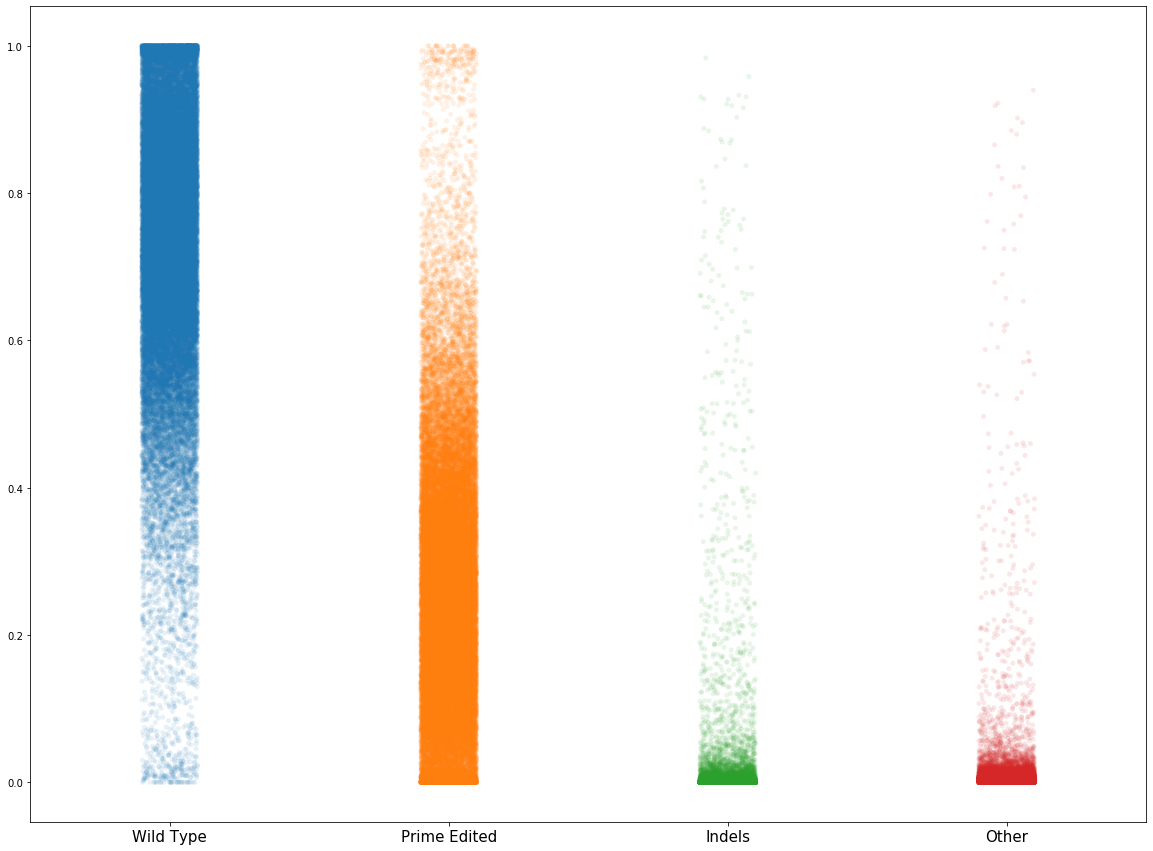

In [58]:
all_reads["experimental"]
df = pd.DataFrame()
# df["totals"] = all_reads["experimental"]["totals"]
df["prime_edits"] = all_reads["experimental"]["pes"]
df["wts"] = all_reads["experimental"]["wts"]
df["indels"] = all_reads["experimental"]["indels"]
df["others"] = all_reads["experimental"]["others"]
df.to_csv("experimental_sample_read_counts.csv")
df["total"] = df.sum(axis=1)

df["frac_pe"] = df["prime_edits"] / df["total"]
df["frac_wt"] = df["wts"] / df["total"]
df["frac_indels"] = df["indels"] / df["total"]
df["frac_others"] = df["others"] / df["total"]

data = [
   df["frac_wt"].values,
   df["frac_pe"].values,
   df["frac_indels"].values,
   df["frac_others"].values,
]

flierprops = dict(marker='o', markerfacecolor='black', markersize=5,
                  linestyle='none', alpha = 0.1)

fig, ax = plt.subplots(figsize = (20, 15))



sns.stripplot(data=data, ax = ax, jitter = 1, alpha = 0.1)
ax.set_xticks([0,1,2,3])
ax.set_xticklabels(["Wild Type", "Prime Edited", "Indels", "Other"], fontsize = 15)

[Text(0, 0, 'Wild Type'),
 Text(0, 0, 'Prime Edited'),
 Text(0, 0, 'Indels'),
 Text(0, 0, 'Other')]

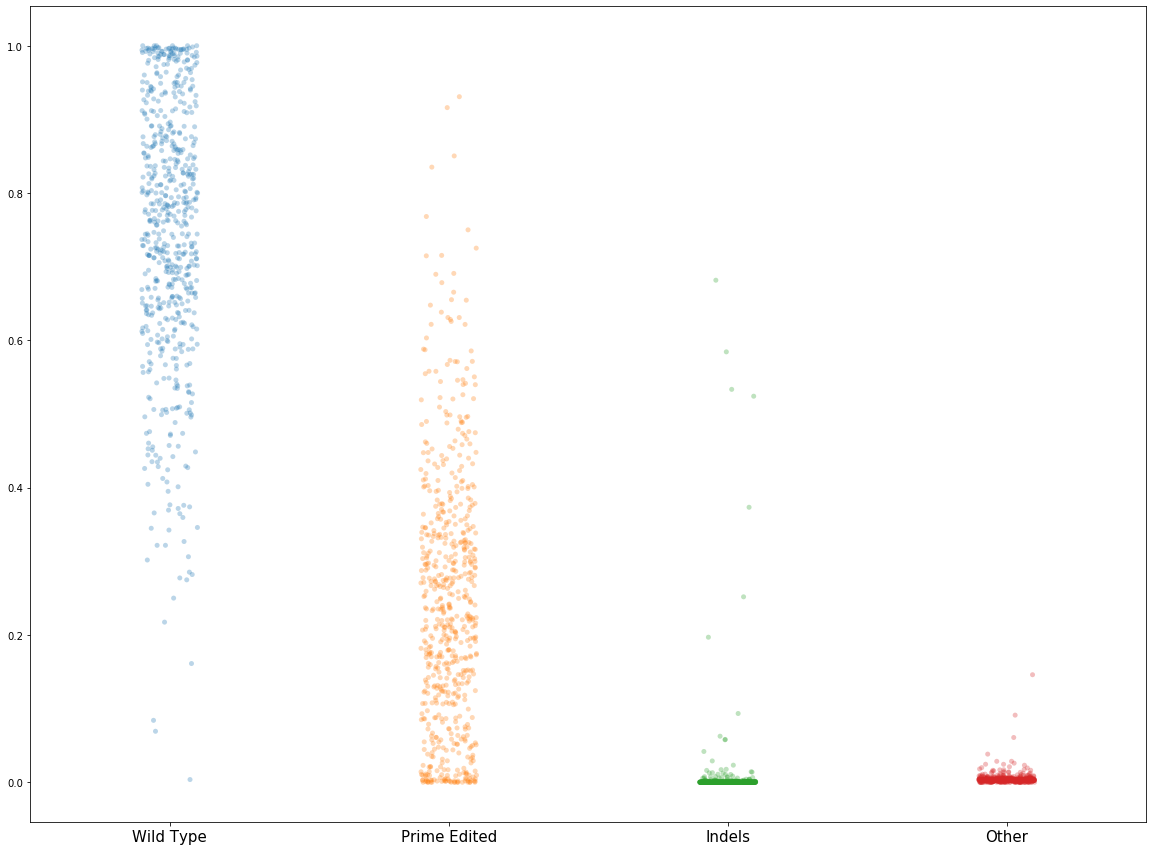

In [64]:
all_reads["control"]
df = pd.DataFrame()
# df["totals"] = all_reads["experimental"]["totals"]
df["prime_edits"] = all_reads["control"]["pes"]
df["wts"] = all_reads["control"]["wts"]
df["indels"] = all_reads["control"]["indels"]
df["others"] = all_reads["control"]["others"]
df.to_csv("control_sample_read_counts.csv")

df["total"] = df.sum(axis=1)

df["frac_pe"] = df["prime_edits"] / df["total"]
df["frac_wt"] = df["wts"] / df["total"]
df["frac_indels"] = df["indels"] / df["total"]
df["frac_others"] = df["others"] / df["total"]

data = [
   df["frac_wt"].values,
   df["frac_pe"].values,
   df["frac_indels"].values,
   df["frac_others"].values,
]

flierprops = dict(marker='o', markerfacecolor='black', markersize=5,
                  linestyle='none', alpha = 0.1)

fig, ax = plt.subplots(figsize = (20, 15))

# sns.boxplot(data=data, showfliers = True, ax = ax, flierprops = flierprops)
sns.stripplot(data=data, ax = ax, alpha = 0.3)
ax.set_xticks([0,1,2,3])
ax.set_xticklabels(["Wild Type", "Prime Edited", "Indels", "Other"], fontsize = 15)




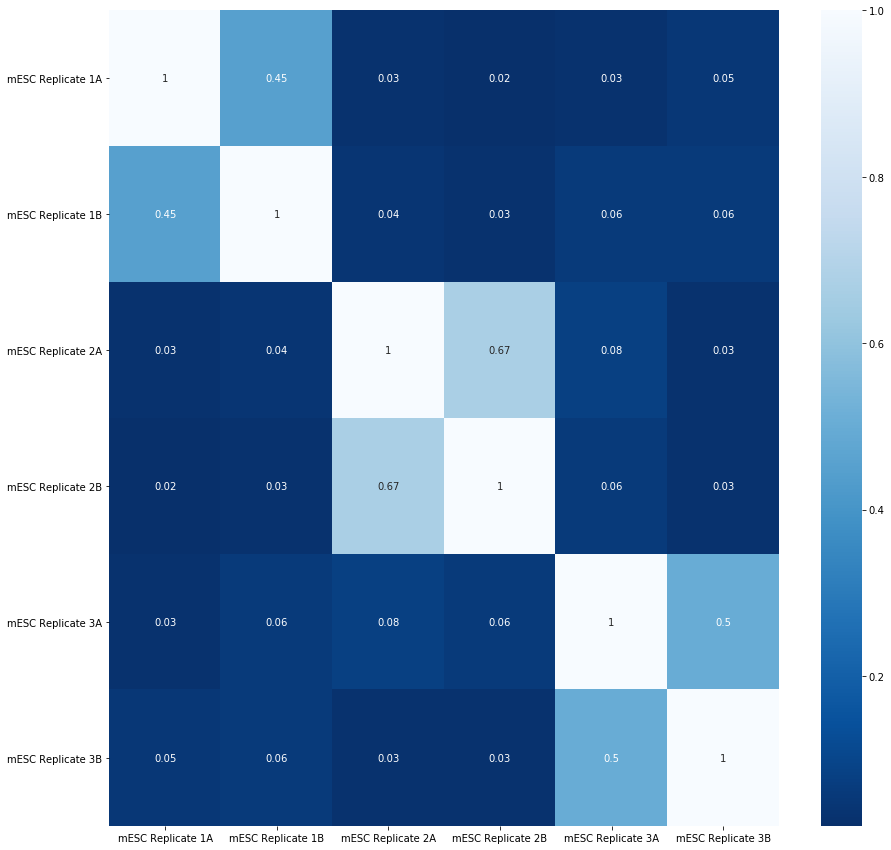

In [129]:
exp_files = [
    "022820_mESC_PE_peptide_library_Rep1",
    "022820_mESC_PE_peptide_library_Rep1B",
    "022720_mESC_PE_peptide_library_Rep2",
    "022720_mESC_PE_peptide_library_Rep2B",
    "022820_mESC_PE_peptide_library_Rep3",
    "022820_mESC_PE_peptide_library_Rep3B"
]

replicates = [
    "mESC Replicate 1A",
    "mESC Replicate 1B",
    "mESC Replicate 2A",
    "mESC Replicate 2B",
    "mESC Replicate 3A",
    "mESC Replicate 3B",
]

replicate_df = None

for r, f in zip(replicates, exp_files):
    df = pd.read_csv("./Data/" + f + ".csv", index_col = "Name")
    df = df.loc[df["Total"] >= 100]
    df[r] = df["prime_edit"] / df["Total"]
    df = df[[r]]
    if replicate_df is None:
        replicate_df = df
        
    else:
        replicate_df = replicate_df.join(df)
        
correlations = [] 
for r1 in replicates:
    c_list = []
    for r2 in replicates:
        if r1 == r2:
            subset = replicate_df[[r1]]
        else:
            subset = replicate_df[[r1,r2]]
        subset = subset.dropna()
        c = scipy.stats.spearmanr(subset[r1].values, subset[r2].values).correlation
        c_list.append(round(c, 2))
    
    correlations.append(c_list)  

    
fig, ax = plt.subplots(figsize = (15,15))

# cmap = sns.cm.blue

sns.heatmap(correlations, ax=ax, annot = True, cmap = "Blues_r")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
ax.set_yticklabels(replicates, rotation = 0)
ax.set_xticklabels(replicates)

fig.savefig("mESC_experimental_replicate_consistency.png", format = "png",  bbox_inches = "tight")

In [89]:
replicate_df

,mESC 1A,mESC 1B,mESC 2A,mESC 2B,mESC 3A,mESC 3B
Name,,,,,,
hblOligo4208_Cat3,0.000000,0.001447,0.000000,0.471074,0.277491,0.603699
hblOligo135333_Cat3,0.415808,NaN,0.304217,0.185941,0.153554,0.117223
hblOligo4209_Cat3,0.323874,0.317331,0.250338,0.179487,0.007299,NaN
hblOligo4209_Cat2,0.187027,0.090977,0.341693,0.560606,0.281719,0.727513
hblOligo135334_Cat3,0.171488,0.254932,0.315009,0.379034,0.488828,0.376761
...,...,...,...,...,...,...
XRCC-5_Cterminal_85aa_aa80_to_alanine,0.072500,0.079767,NaN,NaN,0.431942,0.122449
XRCC-5_Cterminal_85aa_aa81_to_alanine,0.024486,0.077788,0.206781,0.201083,0.238353,0.246297
XRCC-5_Cterminal_85aa_aa82_to_alanine,0.002597,NaN,0.512821,0.198925,0.375788,0.391833


60
1.9730000000000003 1.3520833333333335


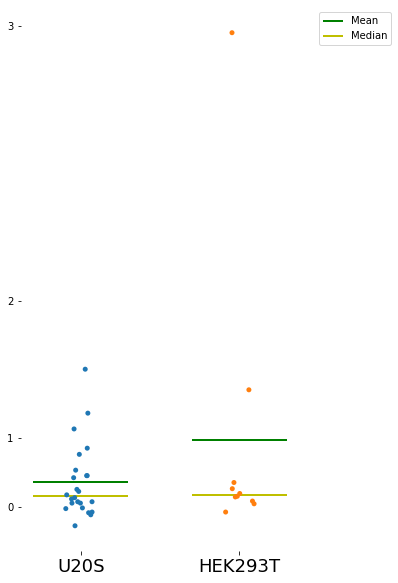

In [214]:
# df= pd.read_csv("supp_figure_p40_data.csv")
df = pd.read_csv("Figure 2f.csv")

print(len(df))

fig, ax = plt.subplots(figsize = (5,10))


v1 = df["U2OS"].dropna().values
v1 = list(map(lambda x : x, v1))

# v2 = df["U2OSrep2"].dropna().values
# v2 = list(map(lambda x : x, v2))

U2OS = v1 

v1 = df["HEK293T"].dropna().values

# v2 = df["HEK293rep2_frac"].dropna().values
# v2 = list(map(lambda x : x, v2))

HEK293 = v1

data = [U2OS, HEK293]

median_hek = np.median(HEK293)
median_usos = np.median(U2OS)

mean_hek = np.mean(HEK293)
mean_usos = np.mean(U2OS)

sns.stripplot(data = data)
ax.set_xticklabels(["U20S", "HEK293T"], fontsize = 18)

y_ticks = [1, 2 , 4, 8]

y_ticklabels = list(map(lambda x : int(np.log2(x)), y_ticks))

ax.set_yticks(y_ticks)
ax.set_yticklabels(y_ticklabels)

ax.hlines(y=mean_usos, xmin=-0.3, xmax=0.3, linewidth=2, color='g', label = "Mean")
ax.hlines(y=mean_hek, xmin=0.7, xmax=1.3, linewidth=2, color='g')

ax.hlines(y=median_usos, xmin=-0.3, xmax=0.3, linewidth=2, color='y', label = "Median")
ax.hlines(y=median_hek, xmin=0.7, xmax=1.3, linewidth=2, color='y')

ax.legend(loc = "upper left", bbox_to_anchor=(1.05, 1))

ax.spines["right"].set_visible(False)

ax.spines["left"].set_visible(False)

ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)


print(mean_hek, mean_usos)



60
[-2, -1, 0, 1, 2, 3]
[0.25, 0.5, 1.0, 2.0, 4.0, 8.0]
0.587014506769743 0.34665129617570195


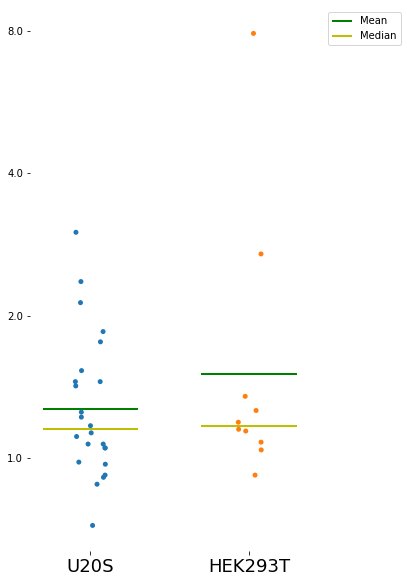

In [231]:
df = pd.read_csv("Figure 2f.csv")

print(len(df))

fig, ax = plt.subplots(figsize = (5,10))


v1 = df["U2OS"].dropna().values
v1 = list(map(lambda x : np.log2(x), v1))

# v2 = df["U2OSrep2"].dropna().values
# v2 = list(map(lambda x : x, v2))

U2OS = v1 

v1 = df["HEK293T"].dropna().values
v1 = list(map(lambda x : np.log2(x), v1))

# v2 = df["HEK293rep2_frac"].dropna().values
# v2 = list(map(lambda x : x, v2))

HEK293 = v1

data = [U2OS, HEK293]

median_hek = np.median(HEK293)
median_usos = np.median(U2OS)

mean_hek = np.mean(HEK293)
mean_usos = np.mean(U2OS)

sns.stripplot(data = data)
ax.set_xticklabels(["U20S", "HEK293T"], fontsize = 18)

y_ticks = [-2,-1, 0, 1 , 2, 3]
y_ticklabels = list(map(lambda x : round(float(2**x), 2), y_ticks))

print(y_ticks)
print(y_ticklabels)
ax.set_yticks(y_ticks)
ax.set_yticklabels(y_ticklabels)

ax.hlines(y=mean_usos, xmin=-0.3, xmax=0.3, linewidth=2, color='g', label = "Mean")
ax.hlines(y=mean_hek, xmin=0.7, xmax=1.3, linewidth=2, color='g')

ax.hlines(y=median_usos, xmin=-0.3, xmax=0.3, linewidth=2, color='y', label = "Median")
ax.hlines(y=median_hek, xmin=0.7, xmax=1.3, linewidth=2, color='y')

ax.legend(loc = "upper left", bbox_to_anchor=(1.05, 1))

ax.spines["right"].set_visible(False)

ax.spines["left"].set_visible(False)

ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)


print(mean_hek, mean_usos)

fig.savefig("fig_2f.pdf", fmt = "pdf", bbox_inches = "tight")

In [206]:
# df = pd.read_csv("Figure 2f.csv")

In [197]:
df["HEK293T"].dropna().values

array([1.26, 1.35, 7.9 , 1.14, 1.04, 1.15, 1.19, 2.7 , 0.92, 1.08])

In [223]:
2**-1

0.5

In [228]:
mean_usos

0.34665129617570195

In [229]:
2**mean_usos


1.2716056186115086